In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler 

In [6]:
cancer = load_breast_cancer()

In [7]:
X   = cancer.data

In [8]:
y = cancer.target

In [9]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify = y,random_state = 10)

In [34]:
clf = KNeighborsClassifier(n_neighbors= 6, metric = 'euclidean')
clf.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [35]:
clf.score(X_train,y_train)

0.9460093896713615

In [36]:
clf.score(X_test,y_test)

0.916083916083916

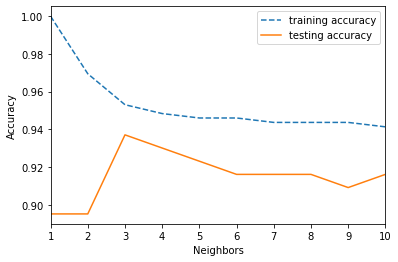

In [37]:
train_accuracy = []
test_accuracy = []
n_neigh = range(1,11)

for neighbour in n_neigh:
    clf = KNeighborsClassifier(n_neighbors= neighbour, metric = 'euclidean')
    clf.fit(X_train,y_train)
    train_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(n_neigh, train_accuracy,label = 'training accuracy',linestyle = 'dashed' )
plt.plot(n_neigh, test_accuracy , label = 'testing accuracy')
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.xticks(ticks = range(1,11))
plt.xlim(1,10)
plt.show()

### NORMALIZING THE DATA

In [12]:
scalar = MinMaxScaler()
X_scal_train = scalar.fit_transform(X_train)
X_scal_test = scalar.transform(X_test)

In [17]:
clf = KNeighborsClassifier(n_neighbors= 6, metric = 'euclidean')
clf.fit(X_scal_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [18]:
clf.score(X_scal_train,y_train)

0.971830985915493

In [19]:
clf.score(X_scal_test,y_test)

0.965034965034965

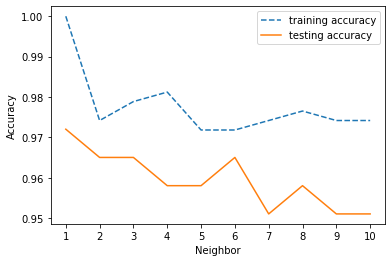

In [24]:
train_accuracy = []
test_accuracy = []
n_neigh = range(1,11)

for neighbor in n_neigh:
    clf = KNeighborsClassifier(n_neighbors= neighbor,metric = 'euclidean')
    clf.fit(X_scal_train,y_train)
    train_accuracy.append(clf.score(X_scal_train,y_train))
    test_accuracy.append(clf.score(X_scal_test,y_test))

plt.plot(n_neigh, train_accuracy , label = 'training accuracy',linestyle = 'dashed')
plt.plot(n_neigh,test_accuracy,label = 'testing accuracy')
plt.legend()
plt.xlabel('Neighbor')
plt.ylabel('Accuracy')
plt.xticks(ticks = range(1,11))
plt.show()